In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import reduce

# see #CLT.ipynb for 2 sample CLT pooled variance

In [1]:
def biasedvar(sample):
    mu = np.mean(sample)
    
    #biased estimator
    return np.mean( (sample - mu)**2)

def unbiasedvar(sample):
    mu = np.mean(sample)
    n = len(sample)

    #unbiased estiamtor of variance
    return n/(n-1)*np.mean( (sample- mu)**2 )

def pooledvarunbiased(n1,v1,n2,v2):
    return ( (n1-1)*(v1) + (n2-1)*(v2) ) / (n1+n2-2)

def pooledvarbiased(n1,v1,n2,v2):
    return ( n1*(v1) + n2*(v2) ) / (n1 + n2)

def mc(n1,m1,n2,m2):
    return (n1*m1 + n2*m2)/(n1+n2)

def cvarbiased(n1,m1,v1,n2,m2,v2):
    Q1 = n1*(v1+(m1**2))
    Q2 = n2*(v2+(m2**2))
    Qc = Q1 + Q2

    nc = n1+n2

    mc = (n1*m1 + n2*m2) / nc

    return (Qc - nc*(mc**2))/(nc) 

def cvarunbiased(n1,m1,v1,n2,m2,v2):
    Q1 = (n1-1)*v1+ n1*(m1**2)
    Q2 = (n2-1)*v2+ n2*(m2**2)
    Qc = Q1 + Q2

    nc = n1+n2

    mc = (n1*m1 + n2*m2) / nc

    return (Qc - nc*(mc**2))/(nc-1) 

def combine_groups_helper(g1,g2):
    #input = 2 tuples of form (n,v,c)
    n1 = g1[0]
    m1 = g1[1]
    v1 = g1[2]

    n2 = g2[0]
    m2 = g2[1]
    v2 = g2[2]

    Q1 = (n1-1)*v1+ n1*(m1**2)
    Q2 = (n2-1)*v2+ n2*(m2**2)
    Qc = Q1 + Q2

    nc = n1+n2

    mc = (n1*m1 + n2*m2) / nc

    vc = (Qc - nc*(mc**2))/(nc-1) 

    return (nc,mc,vc)

def combine_groups(groups):
    #takes in a list of tuples of form (n,v,c)

    #reduce function
    return reduce(combine_groups_helper,groups)

 

n:
73 67 

means
33.35526458358751 30.87930933240484 

vars
np.var 176.21630977937394 165.8209724032662
biased 176.21630977937394 165.8209724032662
unbiased 178.6637585263097 168.33341137907328 

grouped stats
mean 32.1703431419501
np.var 172.77117196361712
biased 172.77117196361712
unbiased 174.01413003529782 

my results:
pooled-biased 171.24139832080812
pooled-unbiased 173.72315771676185
cvar-biased 172.77117196361712
cvar-unbiased 174.01413003529782


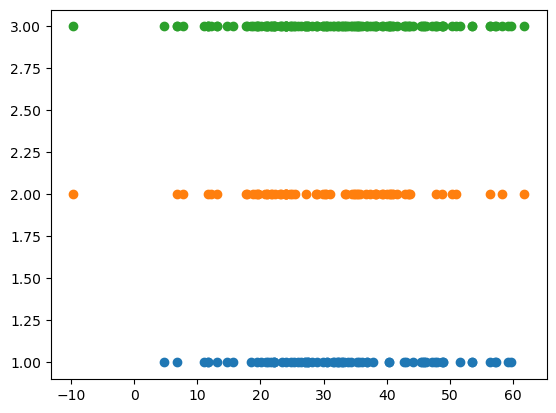

In [3]:
#test how to combine means and variances of 2 samples!
np.random.seed(3)

#sample1 = np.random.rand(10)*20
#sample2 = np.random.rand(15)*10
#test
sample1 = [np.random.normal(34.92,12.49) for i in range(73)]
sample2 = [np.random.normal(31.39,14.07) for i in range(67)]
#sample1 = [1,5,6,2,3,100,76,45.5,60,27]
#ample2 = [5,6,0,15,29]
csample = np.concatenate([sample1,sample2])

fig,ax = plt.subplots()
ax.scatter(sample1,[1 for i in sample1])
ax.scatter(sample2,[2 for i in sample2])
ax.scatter(csample,[3 for i in csample])

print("n:")
n1 = len(sample1)
n2 = len(sample2)
print(len(sample1), len(sample2), "\n")

print("means")
m1 = np.mean(sample1)
m2 = np.mean(sample2)
print(np.mean(sample1), np.mean(sample2), "\n")

print("vars")
print("np.var",np.var(sample1),np.var(sample2))
print("biased",biasedvar(sample1),biasedvar(sample2))
print("unbiased",unbiasedvar(sample1),unbiasedvar(sample2),"\n")

print("grouped stats")
print("mean", np.mean(csample))
print("np.var",np.var(csample))
print("biased",biasedvar(csample))
print("unbiased",unbiasedvar(csample),"\n")

print("my results:")
print("pooled-biased",pooledvarbiased(n1,biasedvar(sample1),n2,biasedvar(sample2)))
print("pooled-unbiased",pooledvarunbiased(n1,unbiasedvar(sample1),n2,unbiasedvar(sample2)))
print("cvar-biased",cvarbiased(n1,m1,biasedvar(sample1),n2,m2,biasedvar(sample2)) )
print("cvar-unbiased",cvarunbiased(n1,m1,unbiasedvar(sample1),n2,m2,unbiasedvar(sample2)) )

#i was feeding into the wrong equation as i had mislabeled them

In [4]:
# Jeniffers study
print("mc",mc(73,34.92,67,31.39))
print("cvarunbiased",cvarunbiased(73,34.92,12.49**2,67,31.39,14.07**2))

m12 = mc(12,24.2,12,23.6)
v12 = cvarunbiased(12,24.2,3.2**2,12,23.6,2.7**2)

#print("cvarunbiased",cvarunbiased(24,m12,v12,12,23.3,2.9**2))

print("Testing combination")
g1 = (73,34.92,12.49**2)
g2 = (67,31.39,14.07**2)
groups = [g1,g2]
print(combine_groups(groups))

print("output")
groups = [(322,14.4,0.6**2),
          (264,33.2,10.6**2),
          (140,33.2,13.3**2),
          (286,24.8,5.97**2),
          (138,37.97,12.4**2),
          (48,20,1.95**2),
          (10,21.7,3.47**2),
          (1122,34.7,10.1**2),
          (50,25,4.79**2),
          (24,23.7,2.9**2),
          (38,22.8,3.96**2)]
print(combine_groups(groups))

#double check
print((60*35.2 + 259*36.2 + 2442*29.966)/(60+259+2442))



mc 33.23064285714286
cvarunbiased 177.935403180884
Testing combination
(140, 33.23064285714286, 177.935403180884)
output
(2442, 29.966363636363635, 137.4259457226922)
30.66453169141616


In [5]:
#New analysis (04/04/22)
groups = [(264,33.2,10.6**2),
          (140,33.2,13.3**2),
          (138,37.97,12.4**2),
          (48,20,1.95**2),
          (10,21.7,3.47**2),
          (1122,34.7,10.1**2),
          (50,25,4.79**2),
          (24,23.7,2.9**2),
          (38,22.8,3.96**2)]

print(combine_groups(groups))

# mean only (60,35.2) (259,36.2)
print((1834*33.50504907 + 60*35.2 + 259*36.2)/(1834+60+259)) 
print(1834+60+259)

(1834, 33.505049073064356, 118.14487351095599)
33.8764793285555
2153


In [8]:
#New analysis (10/02/23)
groups = [(295,1.91,1.3**2),
          (295,3.59,2.8**2)]

print(combine_groups(groups))

(590, 2.75, 5.463707979626483)


In [7]:
5.463707979626483**0.5

2.337457588840166